# Data Description
<table>
    <tr>
        <th>Variable</th>
        <th>Definition</th>
        <th>Key</th>
    </tr>
    <tr>
        <td>survival</td>
        <td>Survival</td>
        <td>0 = No, 1 = Yes</td>
    </tr>
    <tr>
        <td>pclass</td>
        <td>Ticket class</td>
        <td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
    </tr>
    <tr>
        <td>sex</td>
        <td>Sex</td>
        <td></td>
    </tr>
    <tr>
        <td>Age</td>
        <td>Age in years</td>
        <td></td>
    </tr>
    <tr>
        <td>sibsp</td>
        <td># of siblings / spouses aboard the Titanic</td>
        <td></td>
    </tr>
    <tr>
        <td>parch</td>
        <td># of parents / children aboard the Titanic</td>
        <td></td>
    </tr>
    <tr>
        <td>ticket</td>
        <td>Ticket number</td>
        <td></td>
    </tr>
    <tr>
        <td>fare</td>
        <td>fare	</td>
        <td></td>
    </tr>
    <tr>
        <td>cabin</td>
        <td>Cabin number</td>
        <td></td>
    </tr>
    <tr>
        <td>embarked</td>
        <td>Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton</td>
        <td></td>
    </tr>
</table>


# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, auc
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Importing Dataset

In [53]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.drop('PassengerId',inplace=True,axis=1)

# Information of Data

In [4]:
print('Information of data:',df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB
Information of data: None


# Exploratory Data Analysis

In [5]:
print('Shape of Data:',df.shape)

Shape of Data: (891, 11)


In [6]:
print('Statistical Summary of data:')
df.describe(include='all')

Statistical Summary of data:


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
missing=df.isna().sum()
percent=df.isna().sum()*100/df.shape[0]
print(pd.concat([missing, percent], axis=1, keys=["Missing", "Percent"]))

          Missing    Percent
Survived        0   0.000000
Pclass          0   0.000000
Name            0   0.000000
Sex             0   0.000000
Age           177  19.865320
SibSp           0   0.000000
Parch           0   0.000000
Ticket          0   0.000000
Fare            0   0.000000
Cabin         687  77.104377
Embarked        2   0.224467


# Preprocessing Data

In [8]:
def preprocess_nullvalues(df):
    df['Age']=df['Age'].fillna(df['Age'].median())
    df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
    df['Fare']=df['Fare'].fillna(df['Fare'].median())
preprocess_nullvalues(df)

In [9]:
def preprocess_cabin(df):
    df['Cabin']=df['Cabin'].fillna('N')
    cabin=[]
    for i in df['Cabin'].values:
        if 'A' in i:
            cabin.append('A')
        elif 'B' in i:
            cabin.append('B')
        elif 'C' in i:
            cabin.append('C')
        elif 'D' in i:
            cabin.append('D')
        elif 'E' in i:
            cabin.append('E')
        elif 'F' in i:
            cabin.append('F')
        elif 'G' in i:
            cabin.append('G')
        elif 'T' in i:
            cabin.append('T')    
        elif 'N' in i:
            cabin.append('N')
    df.drop('Cabin',inplace=True,axis=1)
    return pd.concat([df,pd.DataFrame(cabin,columns=['Cabin'])],axis=1)

df=preprocess_cabin(df)

In [10]:
def preprocess_ticket(df):
    ticket=[]
    for i in df['Ticket'].values:
        if i=='LINE':
            i=0
        else:
            i=(int(i.split()[-1]))
        ticket.append(i)
    df.drop('Ticket',inplace=True,axis=1)
    return pd.concat([df,pd.DataFrame(ticket,columns=['Ticket'])],axis=1)

df=preprocess_ticket(df)

In [11]:
def preprocess_name(df):
    title=[]
    for i in df['Name'].values:
        if 'Master' in i:
            title.append('Master')
        elif 'Miss' in i:
            title.append('Miss')
        elif 'Mr' in i:
            title.append('Mr')
        elif 'Mrs' in i:
            title.append('Mrs')
        else:
            title.append('Nan')
    df.drop('Name',inplace=True,axis=1)
    return pd.concat([df,pd.DataFrame(title,columns=['Title'])],axis=1)
df=preprocess_name(df)

In [12]:
df['Family']=df['SibSp']+df['Parch']
df.drop('SibSp',inplace=True,axis=1)
df.drop('Parch',inplace=True,axis=1)

In [13]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Cabin,Ticket,Title,Family
0,0,3,male,22.0,7.2500,S,N,21171,Mr,1
1,1,1,female,38.0,71.2833,C,C,17599,Mr,1
2,1,3,female,26.0,7.9250,S,N,3101282,Miss,0
3,1,1,female,35.0,53.1000,S,C,113803,Mr,1
4,0,3,male,35.0,8.0500,S,N,373450,Mr,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,N,211536,Nan,0
887,1,1,female,19.0,30.0000,S,B,112053,Miss,0
888,0,3,female,28.0,23.4500,S,N,6607,Miss,3
889,1,1,male,26.0,30.0000,C,C,111369,Mr,0


# Data Visualization

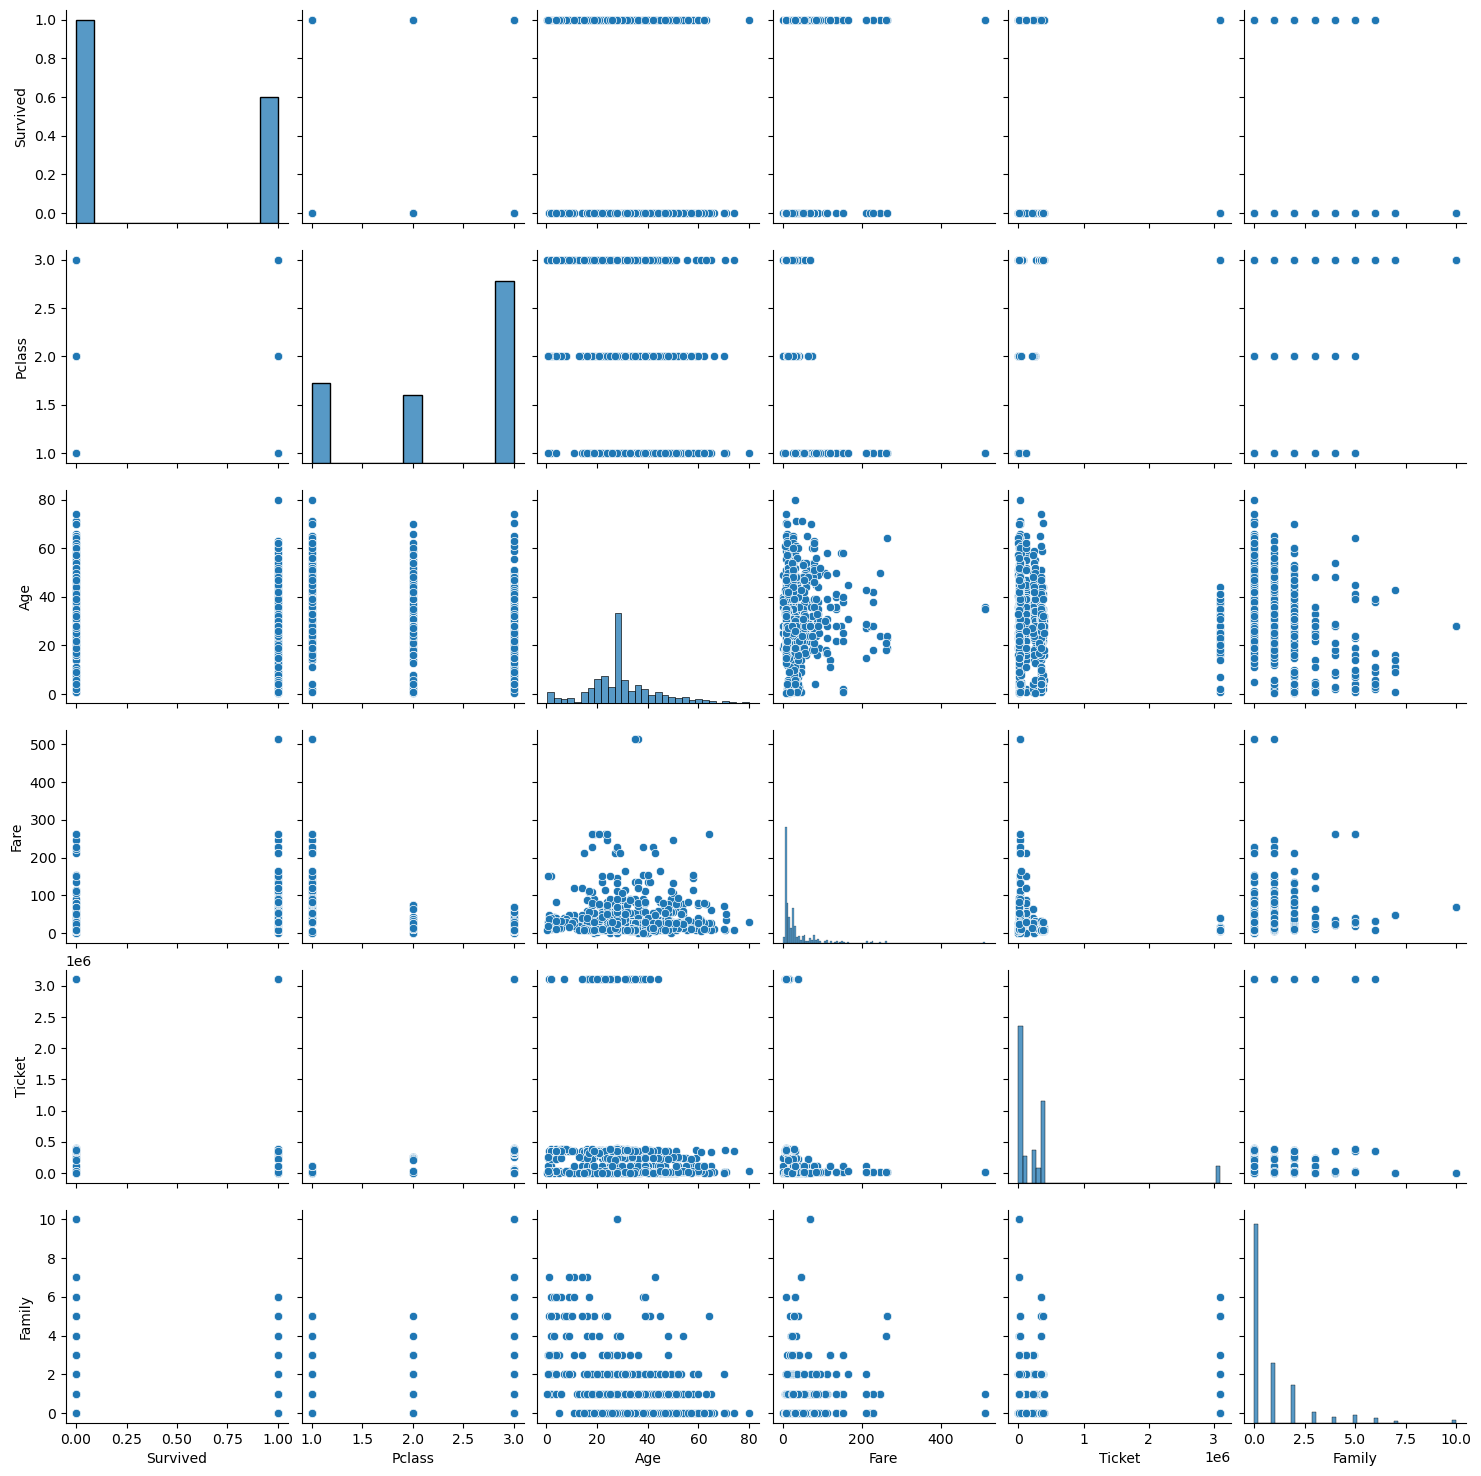

In [14]:
sns.pairplot(data=df)

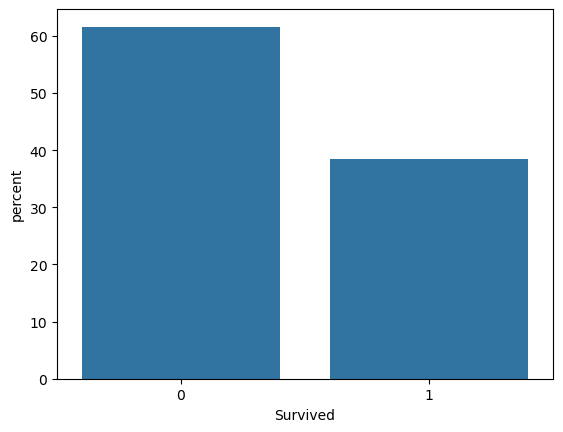

          Count    Percent
Survived                  
0           549  61.616162
1           342  38.383838


In [15]:
sns.countplot(x='Survived',data=df,stat='percent')
plt.show()

count=df['Survived'].value_counts()
percent=df['Survived'].value_counts()*100/df.shape[0]
print(pd.concat([count, percent], axis=1, keys=["Count", "Percent"]))

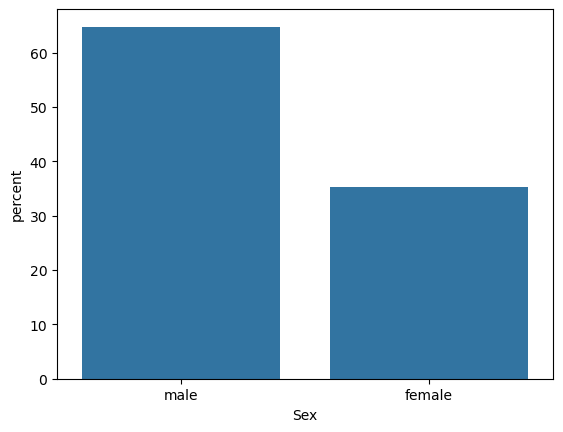

        Count    Percent
Sex                     
male      577  64.758698
female    314  35.241302


In [16]:
sns.countplot(x='Sex',data=df,stat='percent')
plt.show()

count=df['Sex'].value_counts()
percent=df['Sex'].value_counts()*100/df.shape[0]
print(pd.concat([count, percent], axis=1, keys=["Count", "Percent"]))

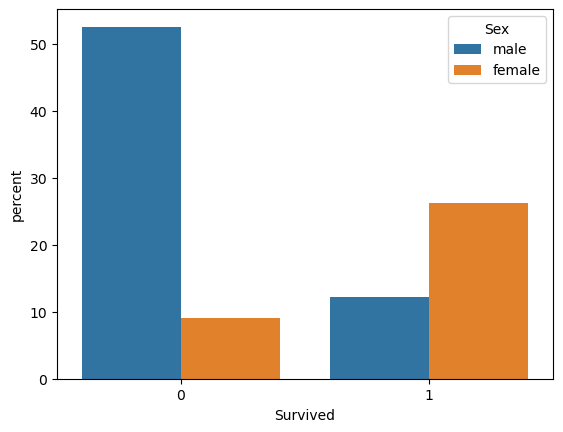


male:

          Count    Percent
Survived                  
0           468  81.109185
1           109  18.890815

female:

          Count    Percent
Survived                  
1           233  74.203822
0            81  25.796178


In [17]:
sns.countplot(x='Survived',hue='Sex',data=df,stat='percent')
plt.show()

for i in df['Sex'].unique():
    print(f'\n{i}:\n')
    count=df['Survived'].loc[df['Sex']==i].value_counts()
    percent=df['Survived'].loc[df['Sex']==i].value_counts()*100/df['Survived'].loc[df['Sex']==i].shape[0]
    print(pd.concat([count, percent], axis=1, keys=["Count", "Percent"]))

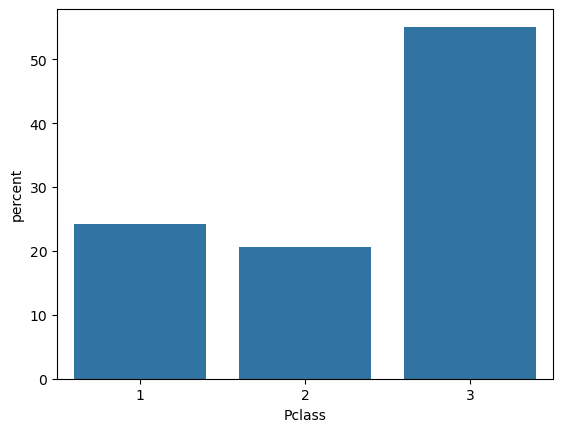

        Count    Percent
Pclass                  
3         491  55.106622
1         216  24.242424
2         184  20.650954


In [18]:
sns.countplot(x='Pclass',data=df,stat='percent')
plt.show()

count=df['Pclass'].value_counts()
percent=df['Pclass'].value_counts()*100/df.shape[0]
print(pd.concat([count, percent], axis=1, keys=["Count", "Percent"]))

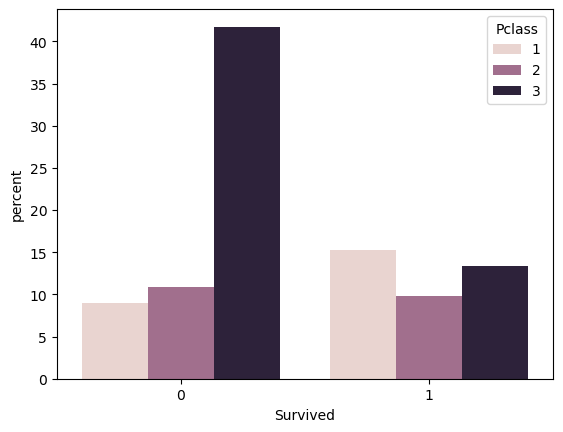


Pclass 3:

          Count    Percent
Survived                  
0           372  75.763747
1           119  24.236253

Pclass 1:

          Count    Percent
Survived                  
1           136  62.962963
0            80  37.037037

Pclass 2:

          Count    Percent
Survived                  
0            97  52.717391
1            87  47.282609


In [19]:
sns.countplot(x='Survived',hue='Pclass',data=df,stat='percent')
plt.show()

for i in df['Pclass'].unique():
    print(f'\nPclass {i}:\n')
    Pclass_count=df['Survived'].loc[df['Pclass']==i].value_counts()
    Pclass_percent=df['Survived'].loc[df['Pclass']==i].value_counts()*100/df['Survived'].loc[df['Pclass']==i].shape[0]
    print(pd.concat([Pclass_count, Pclass_percent], axis=1, keys=["Count", "Percent"]))

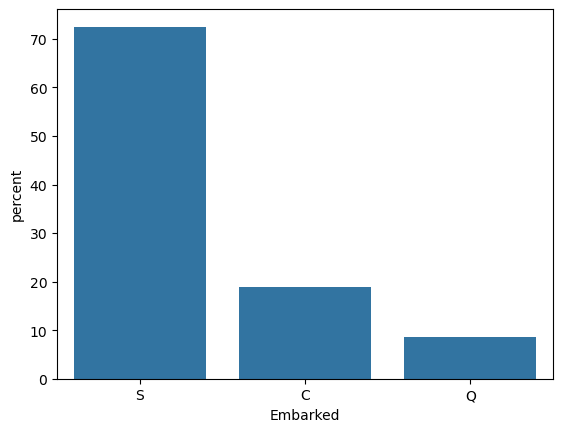

          Count    Percent
Embarked                  
S           646  72.502806
C           168  18.855219
Q            77   8.641975


In [20]:
sns.countplot(x='Embarked',data=df,stat='percent')
plt.show()

count=df['Embarked'].value_counts()
percent=df['Embarked'].value_counts()*100/df.shape[0]
print(pd.concat([count, percent], axis=1, keys=["Count", "Percent"]))

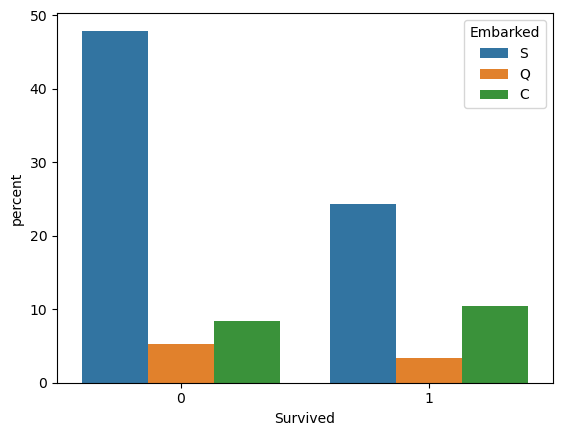


Embarked S:

          Count    Percent
Survived                  
0           427  66.304348
1           217  33.695652

Embarked C:

          Count    Percent
Survived                  
1            93  55.357143
0            75  44.642857

Embarked Q:

          Count    Percent
Survived                  
0            47  61.038961
1            30  38.961039

Embarked nan:

Empty DataFrame
Columns: [Count, Percent]
Index: []


In [55]:
sns.countplot(x='Survived',hue='Embarked',data=df,stat='percent')
plt.show()

for i in df['Embarked'].unique():
    print(f'\nEmbarked {i}:\n')
    Embarked_count=df['Survived'].loc[df['Embarked']==i].value_counts()
    Embarked_percent=df['Survived'].loc[df['Embarked']==i].value_counts()*100/df['Survived'].loc[df['Embarked']==i].shape[0]
    print(pd.concat([Embarked_count, Embarked_percent], axis=1, keys=["Count", "Percent"]))

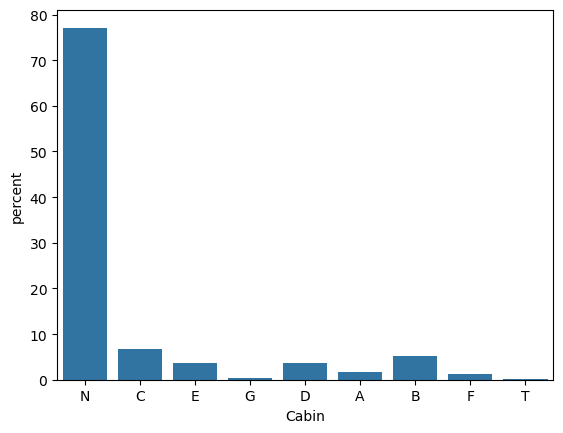

       Count    Percent
Cabin                  
N        687  77.104377
C         59   6.621773
B         47   5.274972
E         33   3.703704
D         33   3.703704
A         15   1.683502
F         12   1.346801
G          4   0.448934
T          1   0.112233


In [22]:
sns.countplot(x='Cabin',data=df,stat='percent')
plt.show()

count=df['Cabin'].value_counts()
percent=df['Cabin'].value_counts()*100/df.shape[0]
print(pd.concat([count, percent], axis=1, keys=["Count", "Percent"]))

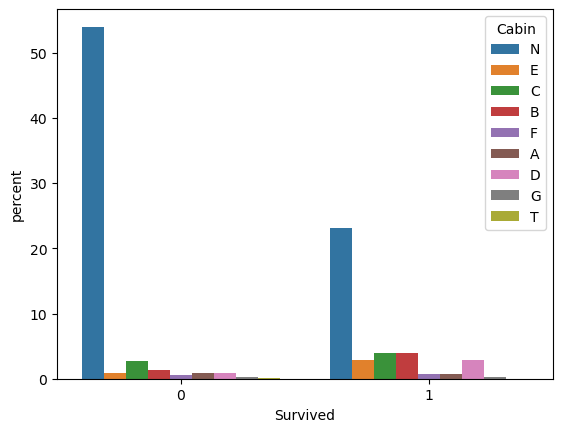


Cabin N:

          Count    Percent
Survived                  
0           481  70.014556
1           206  29.985444

Cabin C:

          Count    Percent
Survived                  
1            35  59.322034
0            24  40.677966

Cabin E:

          Count    Percent
Survived                  
1            25  75.757576
0             8  24.242424

Cabin G:

          Count  Percent
Survived                
1             2     50.0
0             2     50.0

Cabin D:

          Count    Percent
Survived                  
1            25  75.757576
0             8  24.242424

Cabin A:

          Count    Percent
Survived                  
0             8  53.333333
1             7  46.666667

Cabin B:

          Count    Percent
Survived                  
1            35  74.468085
0            12  25.531915

Cabin F:

          Count    Percent
Survived                  
1             7  58.333333
0             5  41.666667

Cabin T:

          Count  Percent
Survived            

In [23]:
sns.countplot(x='Survived',hue='Cabin',data=df,stat='percent')
plt.show()

for i in df['Cabin'].unique():
    print(f'\nCabin {i}:\n')
    Embarked_count=df['Survived'].loc[df['Cabin']==i].value_counts()
    Embarked_percent=df['Survived'].loc[df['Cabin']==i].value_counts()*100/df['Survived'].loc[df['Cabin']==i].shape[0]
    print(pd.concat([Embarked_count, Embarked_percent], axis=1, keys=["Count", "Percent"]))

Text(0.5, 1.0, 'survived')

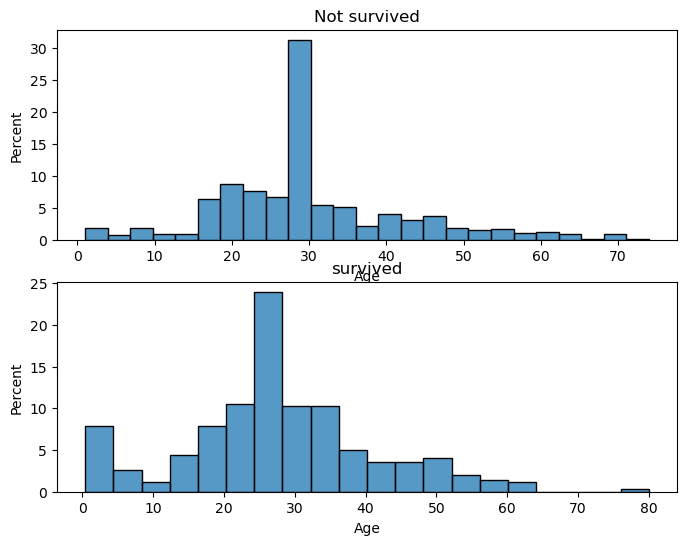

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
sns.histplot(x=df["Age"][df["Survived"]==0],ax = axes[0],stat='percent')
axes[0].set_title("Not survived")
sns.histplot(x=df["Age"][df["Survived"]==1],ax = axes[1],stat='percent')
axes[1].set_title("survived")

Text(0.5, 1.0, 'survived')

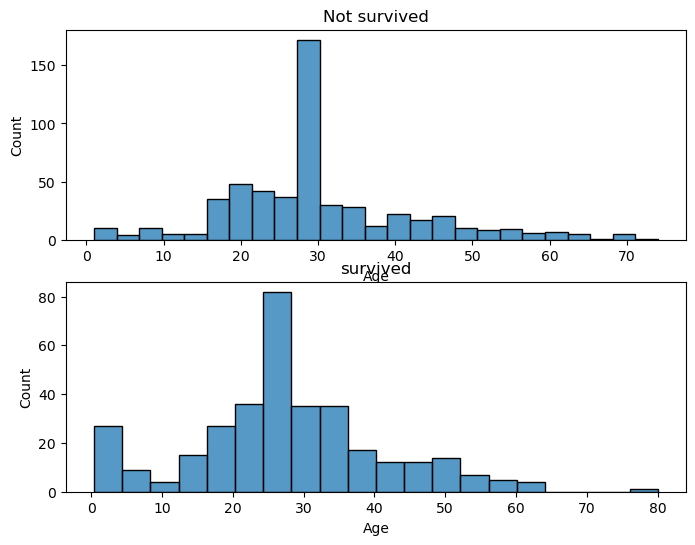

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
sns.histplot(x=df["Age"][df["Survived"]==0],ax = axes[0],stat='count')
axes[0].set_title("Not survived")
sns.histplot(x=df["Age"][df["Survived"]==1],ax = axes[1],stat='count')
axes[1].set_title("survived")

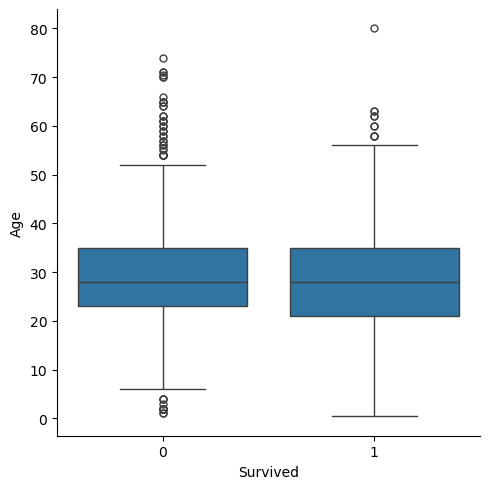

In [26]:
sns.catplot(data=df, x='Survived', y='Age', kind="box")
plt.show()

# Data Encoding

In [27]:
le_Sex=LabelEncoder()
df['Sex']=le_Sex.fit_transform(df['Sex'])

le_Embarked=LabelEncoder()
df['Embarked']=le_Embarked.fit_transform(df['Embarked'])

le_Cabin=LabelEncoder()
df['Cabin']=le_Cabin.fit_transform(df['Cabin'])

le_Title=LabelEncoder()
df['Title']=le_Title.fit_transform(df['Title'])

In [28]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Cabin,Ticket,Title,Family
0,0,3,1,22.0,7.2500,2,7,21171,2,1
1,1,1,0,38.0,71.2833,0,2,17599,2,1
2,1,3,0,26.0,7.9250,2,7,3101282,1,0
3,1,1,0,35.0,53.1000,2,2,113803,2,1
4,0,3,1,35.0,8.0500,2,7,373450,2,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,2,7,211536,3,0
887,1,1,0,19.0,30.0000,2,1,112053,1,0
888,0,3,0,28.0,23.4500,2,7,6607,1,3
889,1,1,1,26.0,30.0000,0,2,111369,2,0


In [29]:
y=df['Survived']
x=df.drop('Survived',axis=1)

std_scaler = StandardScaler()

df_scaled = std_scaler.fit_transform(x.to_numpy())
df = pd.DataFrame(df_scaled, columns=x.columns.values)

In [30]:
corr=df.corr()
corr

,Pclass,Sex,Age,Fare,Embarked,Cabin,Ticket,Title,Family
Pclass,1.000000,0.131900,-0.339898,-0.549500,0.162098,0.741359,0.284016,-0.109608,0.065997
Sex,0.131900,1.000000,0.081163,-0.182333,0.108262,0.119328,0.075693,0.375531,-0.200988
Age,-0.339898,0.081163,1.000000,0.096688,-0.018754,-0.255398,-0.100265,0.482141,-0.245619
Fare,-0.549500,-0.182333,0.096688,1.000000,-0.224719,-0.525433,-0.155371,-0.084282,0.217138
Embarked,0.162098,0.108262,-0.018754,-0.224719,1.000000,0.200425,0.192306,0.030882,0.066516
Cabin,0.741359,0.119328,-0.255398,-0.525433,0.200425,1.000000,0.186752,-0.042125,0.011924
Ticket,0.284016,0.075693,-0.100265,-0.155371,0.192306,0.186752,1.000000,-0.017388,0.015832
Title,-0.109608,0.375531,0.482141,-0.084282,0.030882,-0.042125,-0.017388,1.000000,-0.359234
Family,0.065997,-0.200988,-0.245619,0.217138,0.066516,0.011924,0.015832,-0.359234,1.000000


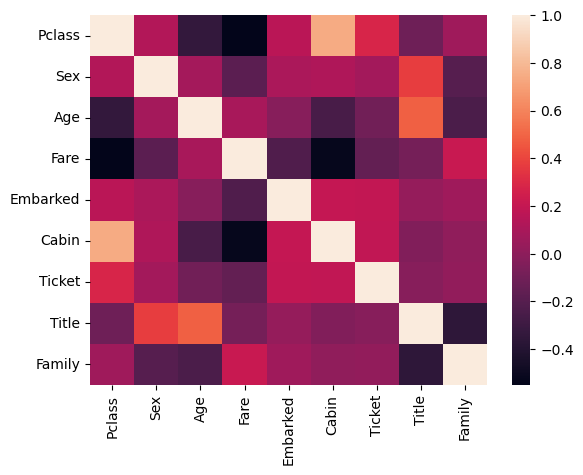

In [31]:
sns.heatmap(corr)
plt.show()

# Data Splitting 

In [32]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2)

In [33]:
print(f'Size of x_train:{x_train.shape}')
print(f'Size of y_train:{y_train.shape}')
print(f'Size of x_val:{x_val.shape}')
print(f'Size of y_val:{y_val.shape}')

Size of x_train:(712, 9)
Size of y_train:(712,)
Size of x_val:(179, 9)
Size of y_val:(179,)


# Machine Learning Model

In [34]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [35]:
print(f'Training Accuracy Socre: {rfc.score(x_train,y_train)*100}')
print(f'Testing Accuracy Socre: {rfc.score(x_val,y_val)*100}')

Training Accuracy Socre: 99.85955056179775
Testing Accuracy Socre: 83.24022346368714


In [36]:
print('\nTraining Classification Report:\n')
print(classification_report(y_train,rfc.predict(x_train)))


Training Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       438
           1       1.00      1.00      1.00       274

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712



In [37]:
print('\nValidation Classification Report:\n')
print(classification_report(y_val,rfc.predict(x_val)))


Validation Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       111
           1       0.80      0.75      0.77        68

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179




 Training Confusion Matrix: 



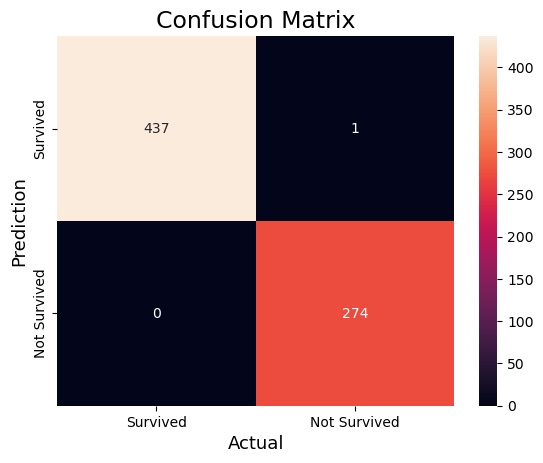

In [38]:
print('\n Training Confusion Matrix: \n')
cm=confusion_matrix(y_train,rfc.predict(x_train))

sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Survived','Not Survived'],
            yticklabels=['Survived','Not Survived'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


 Validation Confusion Matrix: 



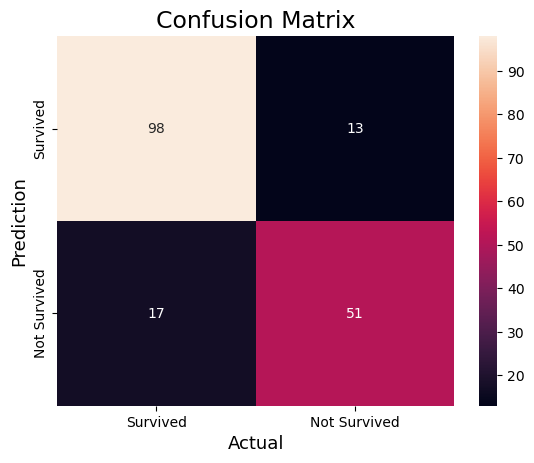

In [39]:
print('\n Validation Confusion Matrix: \n')
cm=confusion_matrix(y_val,rfc.predict(x_val))

sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Survived','Not Survived'],
            yticklabels=['Survived','Not Survived'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

# Prediction on Testing Data

In [40]:
test=pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [41]:
test.drop('PassengerId',inplace=True,axis=1)

In [42]:
print('Shape of Data:',df.shape)

Shape of Data: (891, 9)


In [43]:
test.describe(include='all')

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [44]:
missing=test.isna().sum()
percent=test.isna().sum()*100/df.shape[0]
print(pd.concat([missing, percent], axis=1, keys=["Missing", "Percent"]))

          Missing    Percent
Pclass          0   0.000000
Name            0   0.000000
Sex             0   0.000000
Age            86   9.652076
SibSp           0   0.000000
Parch           0   0.000000
Ticket          0   0.000000
Fare            1   0.112233
Cabin         327  36.700337
Embarked        0   0.000000


In [45]:
preprocess_nullvalues(test)
test=preprocess_cabin(test)
test=preprocess_ticket(test)
test=preprocess_name(test)
test['Family']=test['SibSp']+test['Parch']
test.drop('SibSp',inplace=True,axis=1)
test.drop('Parch',inplace=True,axis=1)

In [46]:
test['Sex']=le_Sex.transform(test['Sex'])
test['Embarked']=le_Embarked.transform(test['Embarked'])
test['Cabin']=le_Cabin.transform(test['Cabin'])
test['Title']=le_Title.transform(test['Title'])

In [47]:
df_test = std_scaler.transform(test.to_numpy())
test = pd.DataFrame(df_test, columns=test.columns.values)

In [48]:
y_pred=rfc.predict(test)

In [49]:
pred=pd.read_csv('gender_submission.csv')
pred['Survived']=y_pred

In [50]:
#pred.to_csv('gender_submission.csv',index=False)

In [51]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,